## Singular value decomposition

Section 7.3.

The singular value decomposition (SVD) of a matrix has many applications ([math exchange discussion](https://mathoverflow.net/questions/408504/listing-applications-of-the-svd), [Daniela Witten's enthusiasm](https://twitter.com/WomenInStat/status/1285610321747611653?s=20)) including [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) and image compression.

If $A$ is $m$ x $n$ then the SVD is $A = USV^*$ where $U$ and $V$ are unitary (conjugate transpose is inverse) and $S$ is real, diagonal and has non-negative elements. The singular values (diagonal of $S$) are unique, but the unitary matrices are not unique. If $A$ is real, then real matrices $U$ and $V$ can be found.

The non-zero eigenvalues of $A^*A$ are the squares of the singular values of $A$.

If $A$ has more rows than columns ($m>n$) there is a thin form of the SVD (just like there was a thin form of the QR decomposition). Drop the rows $n+1$ to $m$ of $S$ and columns $n+1$ to $m$ of $U$.


The singular values give the condition number and norm of a matrix.

In [6]:
using LinearAlgebra
A1 = rand(5,5)
A2 = [ 1/(1+i+j) for i in 1:5, j in 1:5]

5×5 Matrix{Float64}:
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125
 0.2       0.166667  0.142857  0.125     0.111111
 0.166667  0.142857  0.125     0.111111  0.1
 0.142857  0.125     0.111111  0.1       0.0909091

In [2]:
A1_singular = svdvals(A1)

5-element Vector{Float64}:
 2.2923236821641235
 0.9195196079847135
 0.619052261713288
 0.29963459434617745
 0.16777035924006797

In [3]:
opnorm(A1, 2), A1_singular[1]

(2.2923236821641235, 2.2923236821641235)

In [4]:
cond(A1), A1_singular[1]/A1_singular[end]

(13.66346053347817, 13.66346053347817)

In [5]:
svdvals(A2)

5-element Vector{Float64}:
 0.8337897940953767
 0.043097883778114174
 0.0012998242525619358
 2.2996195373489706e-5
 1.7988925196852449e-7

## Comparison with eigendecomposition for square symmetric matrices

Why SVD instead of EVD (eigenvalues)? 

* You can find the SVD of any matrix (eigenvalues only exist for square matrices and there are degenerate cases).
* For a square, symmetric $A$, you can write $A = X^TX$ and then the singular vectors of $X$ are the eigenvectors of $A$ and the singular values of $X$ are the squareroot of the eigenvalues of $A$.

There are a few ways to compute the SVD, one of which is to use the QR iteration we discussed to find eigenvalues, right and left eigenvalues.

In [6]:
X = rand(5,5)
A = X' * X  # This matrix is commonly formed when solving overdetermined linear systems (regression)

5×5 Matrix{Float64}:
 2.19587  1.41787  1.62925   0.70235   1.03349
 1.41787  1.83686  1.05755   0.67092   1.5438
 1.62925  1.05755  1.36563   0.648664  0.720664
 0.70235  0.67092  0.648664  0.498383  0.462961
 1.03349  1.5438   0.720664  0.462961  1.4868

In [7]:
svd(X).V 

5×5 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.563629  -0.484773    0.46927   -0.208779    0.428387
 -0.518363   0.447013   -0.136396  -0.632873   -0.335182
 -0.432093  -0.445903   -0.223762   0.417847   -0.62434
 -0.22957   -0.0724353  -0.815214   0.0341673   0.525651
 -0.417393   0.600914    0.215727   0.616538    0.195006

In [8]:
eigen(A).vectors

5×5 Matrix{Float64}:
  0.428387  -0.208779   -0.46927   -0.484773   -0.563629
 -0.335182  -0.632873    0.136396   0.447013   -0.518363
 -0.62434    0.417847    0.223762  -0.445903   -0.432093
  0.525651   0.0341673   0.815214  -0.0724353  -0.22957
  0.195006   0.616538   -0.215727   0.600914   -0.417393

In [9]:
svd(X).S .^ 2

5-element Vector{Float64}:
 5.800320955126759
 1.210901236233372
 0.2618713866096056
 0.06619265143729577
 0.04426199417538664

In [10]:
eigen(A).values

5-element Vector{Float64}:
 0.04426199417538663
 0.06619265143729566
 0.2618713866096055
 1.2109012362333715
 5.800320955126751

## Dimension reduction

Section 7.5.

The SVD can be used to reconstruct approximations to a matrix using less information. We select the columns and rows of $U$ and $V$ that correspond to the largest singular values.

Define $A_k = \sum_{i=1}^k \sigma_iu_iv_i^T$. This is commonly written as $U_kS_kV_K^T$ where the $k$ subscript means to take the first k columns and rows of $U$ and $V$ and upper-left square part of $S$.

In [9]:
function my_svd_approx(A, k)
    U,σ,V = svd(A) 
    Ak = U[:,1:k]*diagm(σ[1:k])*V[:,1:k]'
end

my_svd_approx (generic function with 1 method)

Get a couple of images:

In [12]:
using Images, FileIO, HTTP
t = tempname()
image_path = "https://cdn.dal.ca/faculty/science/math-stats/_jcr_content/contentPar/featureslider/featureSlider/featureslide_50828652/image.adaptive.320.high.jpg/1533923288644.jpg"
HTTP.download(image_path, t, update_period = Inf)


┌ Warning: Reading one byte at a time from HTTP.Stream is inefficient.
│ Use: io = BufferedInputStream(http::HTTP.Stream) instead.
│ See: https://github.com/BioJulia/BufferedStreams.jl
└ @ HTTP.Streams ~/.julia/packages/HTTP/RxlHW/src/Streams.jl:240


"/var/folders/f9/hrk12n5x4cggf82gcnlx23bm0000gn/T/jl_CrSXuPMLsR"

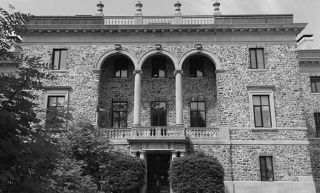

In [13]:
img = load(t)
Chase = @. Float32(Gray(img))
Gray.(Chase)

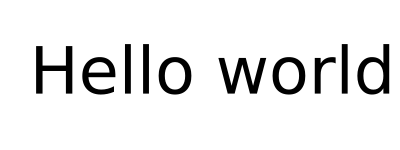

In [14]:
using Plots
plot(annotations=(0.5,0.5, text("Hello world", 44, :center, :middle)),
    grid=:none, frame=:none, size=(400,150))
savefig("hello.png")
img = load("hello.png")
HW = @. Float32(Gray(img))
Gray.(HW)

In [15]:
size(HW)

(150, 400)

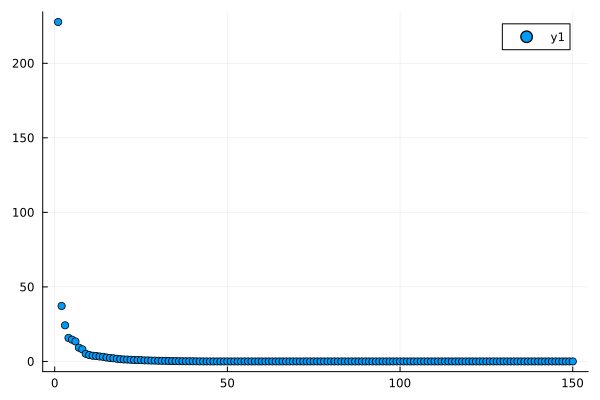

In [16]:
scatter(svdvals(HW)) #  , yscale = :log10)

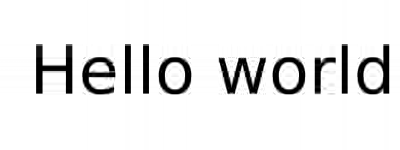

In [17]:
Gray.(my_svd_approx(HW, 10))

In [18]:
U,σ,V = svd(HW) 
size(U[:,1:10]), size(V[:,1:10]')

((150, 10), (10, 400))

In [19]:
prod(size(HW)), 150 * 10 + 10 + 10*400

(60000, 5510)

In [20]:
function svd_size(A, k) 
    m, n = size(A)
    s = m*k + k + k*n
    s, s/(m*n)
end

svd_size (generic function with 1 method)

In [21]:
svd_size(HW, 10)

(5510, 0.09183333333333334)

In [22]:
size(Chase)

(193, 320)

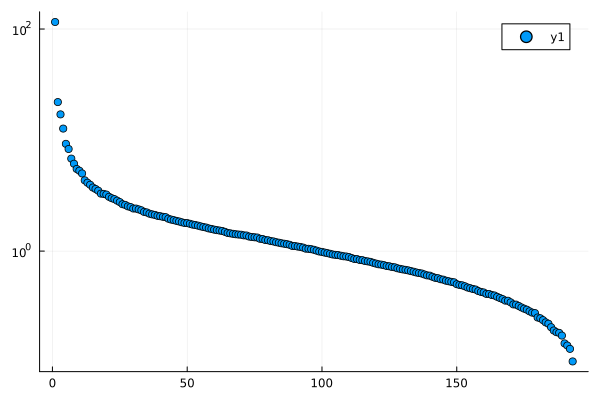

In [23]:
scatter(svdvals(Chase), yscale = :log10)

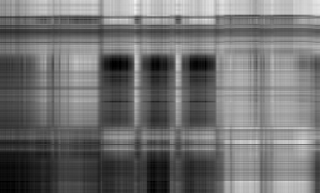

In [24]:
Gray.(my_svd_approx(Chase, 3))

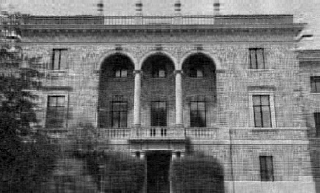

In [25]:
Gray.(my_svd_approx(Chase, 30))

In [26]:
svd_size(Chase, 30)

(15420, 0.2496761658031088)

Iris data from R

In [7]:
using RDatasets
iris = dataset("datasets", "iris")
irisM = Matrix(iris[:,1:4])
svdvals(irisM)

4-element Vector{Float64}:
 95.95991387196453
 17.761033657328564
  3.460930930386973
  1.8848263059180457

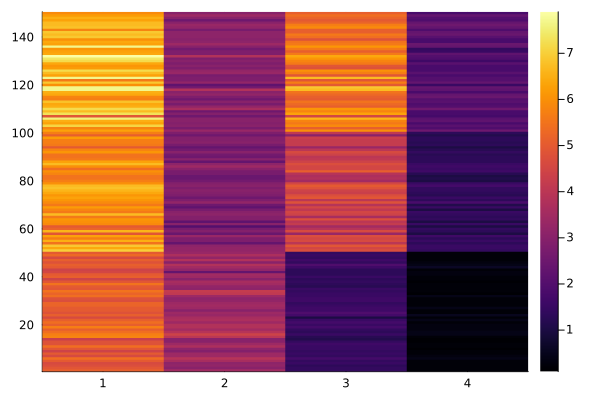

In [5]:
using Plots
heatmap(irisM)

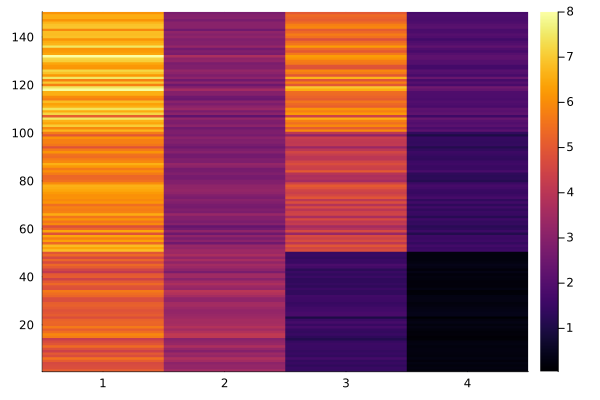

In [10]:
heatmap(my_svd_approx(irisM, 2))

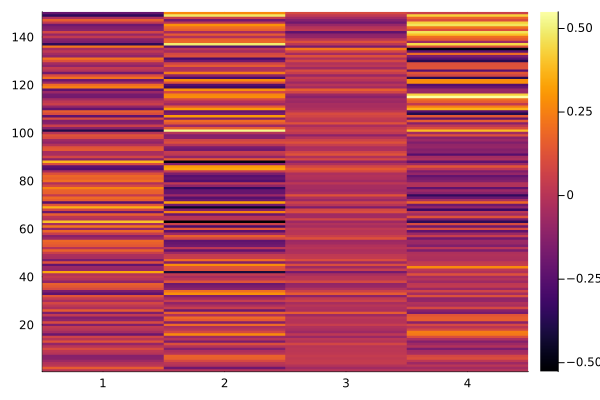

In [11]:
heatmap(irisM .- my_svd_approx(irisM, 2))

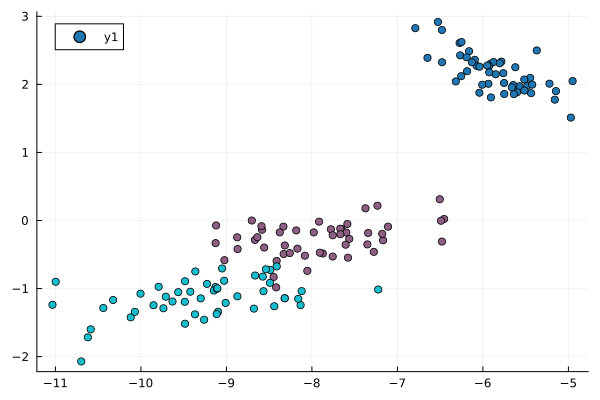

In [12]:
using CategoricalArrays
colours = palette(:tab10, 3)
U, σ, V = svd(irisM);
scatter(irisM * V[:,1], irisM * V[:,2], color = colours[levelcode.(iris[:, :Species])]) 

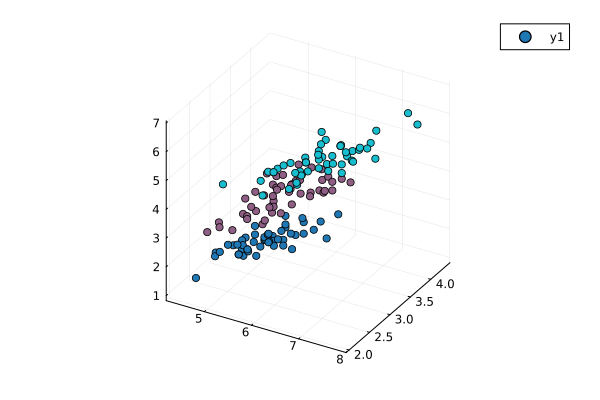

In [13]:
scatter(irisM[:,1], irisM[:,2], irisM[:,3], color = colours[levelcode.(iris[:, :Species])]) 

In [22]:
import PlotlyJS
PlotlyJS.plot([PlotlyJS.scatter3d(; x= irisM[:,1], y= irisM[:,2], z = irisM[:,3], 
                                   mode = "markers",
 marker = PlotlyJS.attr(size = 5, color = colours[levelcode.(iris[:, :Species])]
))])  

data: [
  "scatter3d with fields marker, mode, type, x, y, and z"
]

layout: "layout with fields margin and template"